In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test-tif-v3', 'train_v2.csv', 'train-tif-v2', 'train-jpg', 'sample_submission_v2.csv', 'test_v2_file_mapping.csv', 'test-jpg-v2']


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import * 
from fastai.vision import *

In [4]:
df = pd.read_csv('../input/train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
np.random.seed(42)
src = (ImageList.from_csv('../input', 'train_v2.csv', 
                          folder='train-jpg', suffix='.jpg')
        .split_by_rand_pct(0.2)
        .label_from_df(label_delim=' '))

In [7]:
data = (src.transform(tfms, size=128)
        .databunch()
        .normalize(imagenet_stats))

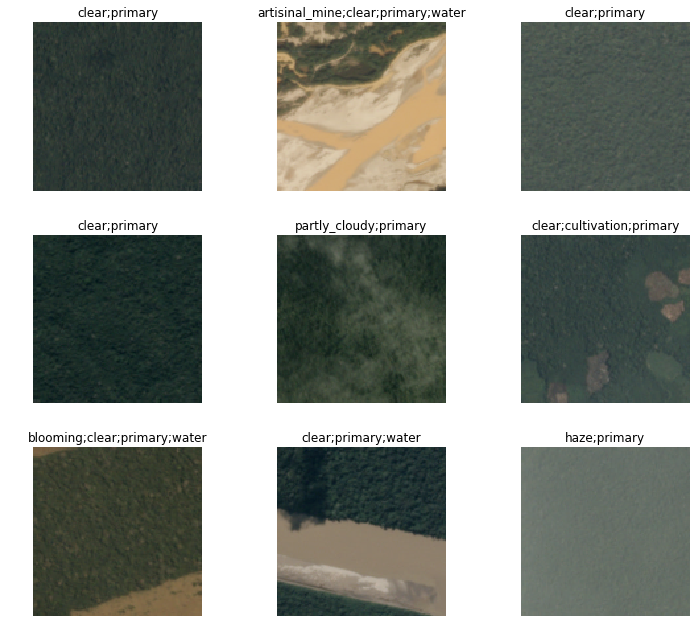

In [8]:
data.show_batch(rows=3, figsize=(10,9))

In [9]:
arch = models.resnet50

In [10]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, model_dir="/temp/model/", metrics=[acc_02, f_score]) 

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:12, 8454968.80it/s]


In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


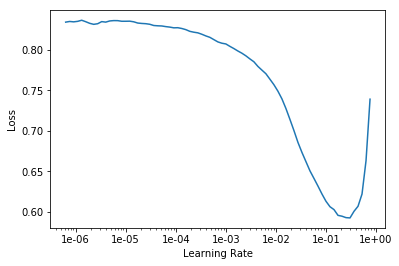

In [12]:
learn.recorder.plot()

In [13]:
lr = 0.01
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.123129,0.111643,0.939730,0.902988,03:28
1,0.109474,0.096413,0.947636,0.913756,03:07
2,0.100629,0.091305,0.954969,0.922453,03:09
3,0.097782,0.086402,0.954257,0.924846,03:09
4,0.089366,0.086071,0.956691,0.925049,03:07


In [14]:
learn.save('stage-1-rn50')

In [15]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


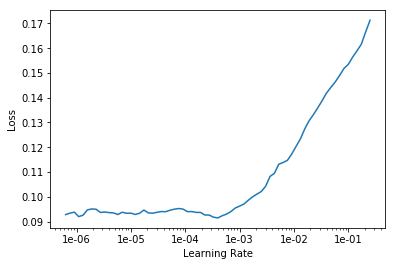

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.096040,0.091176,0.955877,0.921887,03:12
1,0.094619,0.089239,0.957498,0.924771,03:13
2,0.089297,0.089569,0.959365,0.922350,03:12
3,0.083101,0.083346,0.958166,0.927915,03:13
4,0.080391,0.082493,0.959074,0.928260,03:12


In [18]:
learn.save('stage-2-rn50')

In [19]:
data = (src.transform(tfms, size=256)
        .databunch()
        .normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [20]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


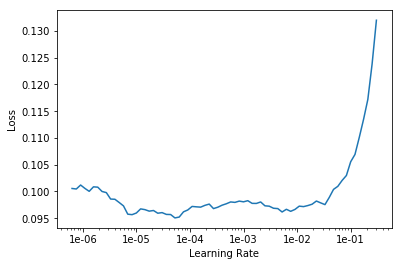

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
lr = 1e-2/2

In [23]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.085942,0.084468,0.957592,0.926995,06:01
1,0.088065,0.084164,0.954729,0.926999,05:58
2,0.083735,0.082142,0.957693,0.930174,05:53
3,0.081034,0.081381,0.959852,0.929730,05:56
4,0.080157,0.081148,0.958791,0.930094,05:58


In [24]:
learn.save('stage-1-256-rn50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


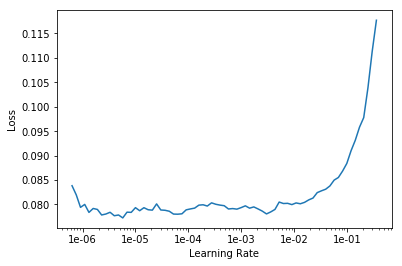

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(5, slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.084833,0.085145,0.957875,0.926060,06:20
1,0.084218,0.085153,0.957374,0.927050,06:19
2,0.084000,0.083194,0.957098,0.929483,06:19
3,0.079505,0.081372,0.958987,0.930778,05:55
4,0.077321,0.081010,0.959292,0.930594,06:14


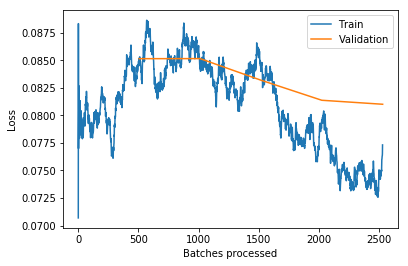

In [28]:
learn.recorder.plot_losses()

In [29]:
learn.save('stage-2-256-rn50')

In [30]:
learn.export('/kaggle/working/export.pkl',destroy=True)

this Learner object self-destroyed - it still exists, but no longer usable


In [31]:
test = (ImageList.from_folder('../input/test-jpg-v2'))#.use_partial_data(0.01))
len(test)

61191

In [32]:
learn_test = load_learner('/kaggle/working/', test=test, num_workers=0, bs=1)
preds, _ = learn_test.get_preds(ds_type=DatasetType.Test)
preds_tta, _ = learn_test.TTA(ds_type=DatasetType.Test)

In [33]:
thresh = 0.15
labelled_preds = [' '.join([learn_test.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
fnames = [f.name[:-4] for f in learn_test.data.test_ds.x.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
df.to_csv('submission_015.csv', index=False)

In [34]:
thresh = 0.18
labelled_preds = [' '.join([learn_test.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
fnames = [f.name[:-4] for f in learn_test.data.test_ds.x.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
df.to_csv('submission_018.csv', index=False)

In [35]:
thresh = 0.19
labelled_preds = [' '.join([learn_test.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
fnames = [f.name[:-4] for f in learn_test.data.test_ds.x.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
df.to_csv('submission_019.csv', index=False)

In [36]:
thresh = 0.20
labelled_preds = [' '.join([learn_test.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
fnames = [f.name[:-4] for f in learn_test.data.test_ds.x.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
df.to_csv('submission_020.csv', index=False)

In [37]:
thresh = 0.21
labelled_preds = [' '.join([learn_test.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]
fnames = [f.name[:-4] for f in learn_test.data.test_ds.x.items]
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])
df.to_csv('submission_021.csv', index=False)